<a href="https://colab.research.google.com/github/tasmia008/bangla-sms-classicfication/blob/main/bangla_sms_classicification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import nltk
import pandas
import re

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/data-set - Sheet1.csv')

In [ ]:
df

,daily,Type
0,৭.৫জিবি ৭৬৳ (৩দিন),Good
1,"১.৪জিবি ৩৮৳, (৩দিন)।",Best
2,২GB ৫০মি ৩দিন ৩৬Tk রিচার্জে বা *123*036*1# বিক...,Best
3,আজ ৪GB +৫০Min +২৫SMS ৫দিন পাবেন ৫৮Tk এয়ারটেলে ...,Better
4,১.৫GB ৫০মি ৩দিন আজ ৩৬Tk এয়ারটেল বা বিকাশ…,Best
...,...,...
504,বোনাস সহ ৯জিবি-১১০টাকা-৩০দিন। ডায়াল *১২১*৫০৭২#,Better
505,বোনাস সহ ৩জিবি-৩০দিন-৩১টাকা নিতে আজই ডায়াল *১২...,Better
506,বোনাস সহ ৩৫জিবি-৩৫০টাকা-৩০দিন। ডায়াল *১২১*৫১০২#,Better
507,৩০দিন মেয়াদে ১৫জিবি মাত্র ১৭০ টাকা! ভিজিট MyGP...,Best


In [ ]:
data = df.rename(columns={'daily': 'data'})

In [ ]:
data

,data,Type
0,৭.৫জিবি ৭৬৳ (৩দিন),Good
1,"১.৪জিবি ৩৮৳, (৩দিন)।",Best
2,২GB ৫০মি ৩দিন ৩৬Tk রিচার্জে বা *123*036*1# বিক...,Best
3,আজ ৪GB +৫০Min +২৫SMS ৫দিন পাবেন ৫৮Tk এয়ারটেলে ...,Better
4,১.৫GB ৫০মি ৩দিন আজ ৩৬Tk এয়ারটেল বা বিকাশ…,Best
...,...,...
504,বোনাস সহ ৯জিবি-১১০টাকা-৩০দিন। ডায়াল *১২১*৫০৭২#,Better
505,বোনাস সহ ৩জিবি-৩০দিন-৩১টাকা নিতে আজই ডায়াল *১২...,Better
506,বোনাস সহ ৩৫জিবি-৩৫০টাকা-৩০দিন। ডায়াল *১২১*৫১০২#,Better
507,৩০দিন মেয়াদে ১৫জিবি মাত্র ১৭০ টাকা! ভিজিট MyGP...,Best


In [ ]:
data.head()

,data,Type
0,৭.৫জিবি ৭৬৳ (৩দিন),Good
1,"১.৪জিবি ৩৮৳, (৩দিন)।",Best
2,২GB ৫০মি ৩দিন ৩৬Tk রিচার্জে বা *123*036*1# বিক...,Best
3,আজ ৪GB +৫০Min +২৫SMS ৫দিন পাবেন ৫৮Tk এয়ারটেলে ...,Better
4,১.৫GB ৫০মি ৩দিন আজ ৩৬Tk এয়ারটেল বা বিকাশ…,Best


In [ ]:
data['Type'].value_counts()

Best      200
Good      172
Better    137
Name: Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


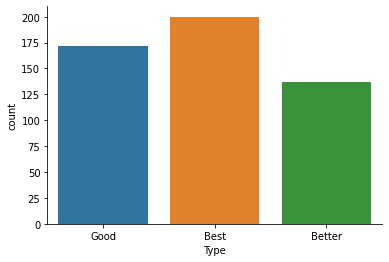

In [ ]:
import seaborn as sns
sns.countplot(data['Type'])
sns.despine()

In [ ]:
#Data cleaning

In [ ]:
data.loc[18,'data']

'৳৩৮-১.৫GB-৩দিন,ডায়াল *123*38#'

In [ ]:
def clean_sentence(sent):


    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', '', sent)
    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', '', sent)

    sent = sent.strip()
    return sent

In [ ]:
data.loc[15,'data']

'৳৫৭-২.৫জিবি ৩দিন'

In [ ]:
for i, sent  in enumerate(data['data'].tolist()):
    data.loc[i,'clean_sentence'] = clean_sentence(sent)

In [ ]:
test = data.loc[15,'clean_sentence']
test

'৳৫৭-২.৫জিবি ৩দিন'

In [ ]:
test = data.loc[2,'clean_sentence']
test

'২GB ৫০মি ৩দিন ৩৬Tk রিচার্জে বা *123*036*1# বিকাশ রিচার্জেও পাবেন'

In [ ]:

def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

In [ ]:
stop_words = {'এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য'}

def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text


In [ ]:
t_data = tokenized_data(test)
r_word = remove_stop_words(t_data)
print('befor :', test)
print('after :', r_word)

befor : ২GB ৫০মি ৩দিন ৩৬Tk রিচার্জে বা *123*036*1# বিকাশ রিচার্জেও পাবেন
after : ২GB ৫০মি ৩দিন ৩৬Tk রিচার্জে *123*036*1# বিকাশ রিচার্জেও পাবেন


In [ ]:
data['clean_data'] = [remove_stop_words(tokenized_data(sent)) for sent in data['clean_sentence'].tolist()]
#del df['sentence']
df.to_csv('sentiment_analysis_clean_data.csv', encoding='utf-8', index=False)

In [ ]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()

        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [ ]:
data

,data,Type,clean_sentence,clean_data
0,৭.৫জিবি ৭৬৳ (৩দিন),Good,৭.৫জিবি ৭৬৳ (৩দিন),৭.৫জিবি ৭৬৳ (৩দিন)
1,"১.৪জিবি ৩৮৳, (৩দিন)।",Best,"১.৪জিবি ৩৮৳, (৩দিন)।","১.৪জিবি ৩৮৳, (৩দিন)।"
2,২GB ৫০মি ৩দিন ৩৬Tk রিচার্জে বা *123*036*1# বিক...,Best,২GB ৫০মি ৩দিন ৩৬Tk রিচার্জে বা *123*036*1# বিক...,২GB ৫০মি ৩দিন ৩৬Tk রিচার্জে *123*036*1# বিকাশ ...
3,আজ ৪GB +৫০Min +২৫SMS ৫দিন পাবেন ৫৮Tk এয়ারটেলে ...,Better,আজ ৪GB +৫০Min +২৫SMS ৫দিন পাবেন ৫৮Tk এয়ারটেলে ...,আজ ৪GB +৫০Min +২৫SMS ৫দিন পাবেন ৫৮Tk এয়ারটেলে ...
4,১.৫GB ৫০মি ৩দিন আজ ৩৬Tk এয়ারটেল বা বিকাশ…,Best,১.৫GB ৫০মি ৩দিন আজ ৩৬Tk এয়ারটেল বা বিকাশ…,১.৫GB ৫০মি ৩দিন আজ ৩৬Tk এয়ারটেল বিকাশ…
...,...,...,...,...
504,বোনাস সহ ৯জিবি-১১০টাকা-৩০দিন। ডায়াল *১২১*৫০৭২#,Better,বোনাস সহ ৯জিবি-১১০টাকা-৩০দিন। ডায়াল *১২১*৫০৭২#,বোনাস সহ ৯জিবি-১১০টাকা-৩০দিন। ডায়াল *১২১*৫০৭২#
505,বোনাস সহ ৩জিবি-৩০দিন-৩১টাকা নিতে আজই ডায়াল *১২...,Better,বোনাস সহ ৩জিবি-৩০দিন-৩১টাকা নিতে আজই ডায়াল *১২...,বোনাস সহ ৩জিবি-৩০দিন-৩১টাকা নিতে আজই ডায়াল *১২...
506,বোনাস সহ ৩৫জিবি-৩৫০টাকা-৩০দিন। ডায়াল *১২১*৫১০২#,Better,বোনাস সহ ৩৫জিবি-৩৫০টাকা-৩০দিন। ডায়াল *১২১*৫১০২#,বোনাস সহ ৩৫জিবি-৩৫০টাকা-৩০দিন। ডায়াল *১২১*৫১০২#
507,৩০দিন মেয়াদে ১৫জিবি মাত্র ১৭০ টাকা! ভিজিট MyGP...,Best,৩০দিন মেয়াদে ১৫জিবি মাত্র ১৭০ টাকা! ভিজিট MyGP...,৩০দিন মেয়াদে ১৫জিবি মাত্র ১৭০ টাকা! ভিজিট MyGP...


In [ ]:
test = data.loc[2,'clean_sentence']
test

'২GB ৫০মি ৩দিন ৩৬Tk রিচার্জে বা *123*036*1# বিকাশ রিচার্জেও পাবেন'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [ ]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()

        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [ ]:
corpus = text_transformation(data['clean_data'])

In [ ]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y =data.Type

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr= LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lr.score(X_test,y_test)

0.47058823529411764

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        Best       0.59      0.40      0.47        43
      Better       0.45      0.19      0.26        27
        Good       0.42      0.81      0.55        32

    accuracy                           0.47       102
   macro avg       0.49      0.46      0.43       102
weighted avg       0.50      0.47      0.44       102



In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
classifier.score(X_test,y_test)

0.4215686274509804

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [ ]:
svm.score(X_test,y_test)

0.45098039215686275

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(X_test,y_test)

0.45098039215686275

In [ ]:
from xgboost import XGBClassifier

x =XGBClassifier(max_depth=10,subsample=0.8,n_estimators=500,learning_rate=0.2,min_child_weight=1,random_state=4)

x.fit(X_train,y_train)

XGBClassifier(learning_rate=0.2, max_depth=10, n_estimators=500,
              objective='multi:softprob', random_state=4, subsample=0.8)

In [ ]:
x.score(X_test,y_test)

0.4803921568627451

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_test,y_test)

0.45098039215686275

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(),
n_estimators=500,
max_samples=0.8,
bootstrap=True,
oob_score=True,
random_state=0
)

In [ ]:
bag_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=500, oob_score=True, random_state=0)

In [ ]:
bag_model.score(X_test,y_test)

0.47058823529411764

In [ ]:
bag_model1 = BaggingClassifier(
base_estimator=XGBClassifier(),
n_estimators=500,
max_samples=0.8,
bootstrap=True,
oob_score=True,
random_state=0
)

In [ ]:
bag_model1.fit(X_train,y_train)

BaggingClassifier(base_estimator=XGBClassifier(), max_samples=0.8,
                  n_estimators=500, oob_score=True, random_state=0)

In [ ]:
bag_model1.score(X_test,y_test)

0.47058823529411764

In [ ]:
bag_model2 = BaggingClassifier(
base_estimator=LogisticRegression(),
n_estimators=500,
max_samples=0.8,
bootstrap=True,
oob_score=True,
random_state=0
)

In [ ]:
bag_model2.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(), max_samples=0.8,
                  n_estimators=500, oob_score=True, random_state=0)

In [ ]:
bag_model2.score(X_test,y_test)

0.47058823529411764

In [ ]:
predictions = bag_model2.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        Best       0.59      0.40      0.47        43
      Better       0.45      0.19      0.26        27
        Good       0.42      0.81      0.55        32

    accuracy                           0.47       102
   macro avg       0.49      0.46      0.43       102
weighted avg       0.50      0.47      0.44       102



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=500)
knn =  KNeighborsClassifier()
xgb =xgb.XGBClassifier(n_estimators=500,
        colsample_bytree=0.5,
        max_depth =10)

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = [('dtc',dtc),('rfc',rfc),('knn',knn),('xgb',xgb)] #list of (str, estimator)

In [ ]:
lr = LogisticRegression()
stack_model = StackingClassifier( estimators = clf,final_estimator = lr)

In [ ]:
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier()),
                               ('rfc',
                                RandomForestClassifier(n_estimators=500)),
                               ('knn', KNeighborsClassifier()),
                               ('xgb',
                                XGBClassifier(colsample_bytree=0.5,
                                              max_depth=10,
                                              n_estimators=500))],
                   final_estimator=LogisticRegression())

In [ ]:
stack_model.score(X_test,y_test)

0.46078431372549017

In [ ]:
bag_model1 = BaggingClassifier(
base_estimator=KNeighborsClassifier(),
n_estimators=5000,
max_samples=0.5,
bootstrap=True,
oob_score=True,
random_state=0
)

In [ ]:
bag_model1.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.5,
                  n_estimators=5000, oob_score=True, random_state=0)

In [ ]:
bag_model1.score(X_test,y_test)

0.4803921568627451

In [ ]:
predictions = bag_model1.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        Best       0.58      0.42      0.49        43
      Better       0.45      0.19      0.26        27
        Good       0.43      0.81      0.57        32

    accuracy                           0.48       102
   macro avg       0.49      0.47      0.44       102
weighted avg       0.50      0.48      0.45       102



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier(n_estimators=500)

In [ ]:
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=500)

In [ ]:
clf.score(X_test,y_test)

0.47058823529411764

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
cv = TfidfVectorizer(ngram_range=(2,3))
traindata = cv.fit_transform(data['clean_data'])
X = traindata
y =data.Type

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=500)

In [ ]:
clf.score(X_test,y_test)

0.5294117647058824

In [ ]:
bag_model1.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.5,
                  n_estimators=5000, oob_score=True, random_state=0)

In [ ]:
bag_model1.score(X_test,y_test)

0.5294117647058824

In [ ]:
predictions = bag_model1.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        Best       0.50      0.58      0.54        43
      Better       0.47      0.26      0.33        27
        Good       0.59      0.69      0.64        32

    accuracy                           0.53       102
   macro avg       0.52      0.51      0.50       102
weighted avg       0.52      0.53      0.51       102



In [ ]:
from xgboost import XGBClassifier

x =XGBClassifier(max_depth=10,subsample=0.5,n_estimators=500,learning_rate=0.2,min_child_weight=1,random_state=4)

x.fit(X_train,y_train)

XGBClassifier(learning_rate=0.2, max_depth=10, n_estimators=500,
              objective='multi:softprob', random_state=4, subsample=0.5)

In [ ]:
x.score(X_test,y_test)

0.49019607843137253

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=500, base_estimator= rf)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=500)

In [ ]:
adaboost.score(X_test,y_test)

0.5

In [ ]:
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier()),
                               ('rfc',
                                RandomForestClassifier(n_estimators=500)),
                               ('knn', KNeighborsClassifier()),
                               ('xgb',
                                XGBClassifier(colsample_bytree=0.5,
                                              max_depth=10,
                                              n_estimators=500))],
                   final_estimator=LogisticRegression())

In [ ]:
stack_model.score(X_test,y_test)

0.5098039215686274

In [ ]:
final_predictions = bag_model1.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

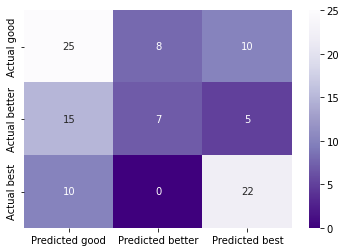

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, final_predictions)
conf_mat = pd.DataFrame(data = cm, columns = ['Predicted good', 'Predicted better','Predicted best'], index = ['Actual good', 'Actual better','Actual best'])
sns.heatmap(conf_mat, annot = True, fmt='d', cmap="Purples_r")

In [ ]:
labels=[ "Good","Best","Better"]
cm = confusion_matrix(y_test, final_predictions, labels=labels)
print(cm)

[[22 10  0]
 [10 25  8]
 [ 5 15  7]]


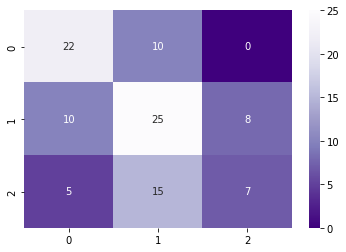

In [ ]:
sns.heatmap(cm, annot = True, fmt='d', cmap="Purples_r")

In [ ]:
print('Precision: %.3f' % precision_score(y_test,final_predictions,average='weighted'))

Precision: 0.521


In [ ]:

print('Recall: %.3f' % recall_score(y_test,final_predictions,average='weighted'))

Recall: 0.529


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print('F1 Score: %.3f' % f1_score(y_test,final_predictions,average='weighted'))

F1 Score: 0.515
